# 4. Seaborn
* Matplotlib and Seaborn are the two best data visualisation libraries in Python.
* Seaborn allows you to create really attractive plots with loads of UI and colour pallette tweaks, whilst Matplotlib is incredibly customisable using many pre-build libraries and functions.
## a) Numerical Data Plotting
### Basics and Standard Plots

In [1]:
# load modules
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# show figures in notebook
%matplotlib inline

* Seaborn stylse control how plots appear (e.g. background colour, colour scheme, grid options, ticks etc.)
* Full list of customisation options here: https://seaborn.pydata.org/tutorial/aesthetics.html
* It also has a bunch of in-built/pre-loaded datasets which you can load (e.g. 'tips' below).
* Full list of available datasets to load found here: https://github.com/mwaskom/seaborn-data
* 'Tips' data is used to figure out which parameters determine how likely someone is to tip the waiter.

In [2]:
# set seaborn style
sns.set(style = 'darkgrid') # shift + tab to check options

# load data (seaborn library has lots of dummy data already)
tips = sns.load_dataset('tips')

# check data
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


* Seaborn understands that if you pass it a df and label x and y the same as columns from your df then it will auto plot these values.

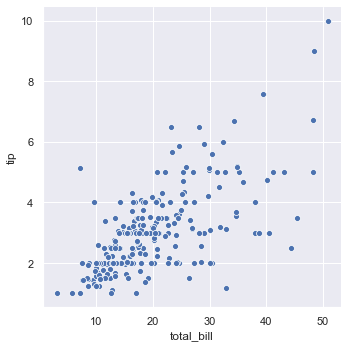

In [3]:
# check data in relational/correlation plot a.k.a. relational plot
sns.relplot(x = "total_bill", y = "tip", data = tips) # shift + tab for options

* You can see from the text label above the plot that this is a FacetGrid, this is an auto generated grid for multiple plots to be plotted on.
* The below "dir" code shows you all of the possible methods you can use to customise your plot(s).

In [4]:
dir(sns.FacetGrid)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bottom_axes',
 '_clean_axis',
 '_facet_color',
 '_facet_plot',
 '_finalize_grid',
 '_get_palette',
 '_inner_axes',
 '_left_axes',
 '_legend_out',
 '_margin_titles',
 '_not_bottom_axes',
 '_not_left_axes',
 '_update_legend_data',
 'add_legend',
 'ax',
 'despine',
 'facet_axis',
 'facet_data',
 'map',
 'map_dataframe',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels']

* The above plot has a positive linear relationship between total bill value and tip value from the shape of the distribution.
* We can now investigate some of the other relationships.
* You can use "hue" to add an extra axis almost of differentiation/data in the plot. Here it's a simple Yes/No for whether or not someone is a smoker so it splits the colours of the points into 2 distinct categories.

In [5]:
# check to see distribution of smoker variable (more non-smokers than smokers)
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

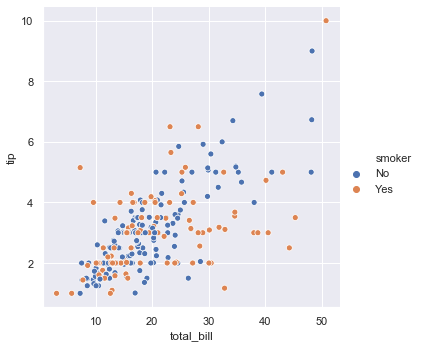

In [6]:
# plot data with smoker/non-smoker in hue)
sns.relplot(x = "total_bill", y = "tip", data = tips, hue = "smoker")

* You can continue to add more variables to the plot.
* However, this can sometimes clutter the chart (see below).

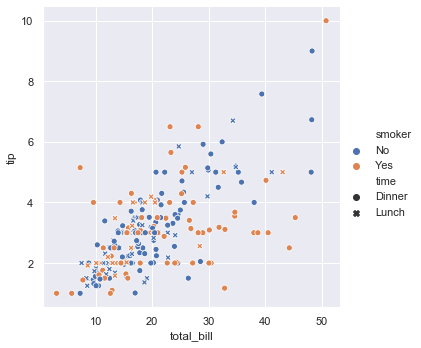

In [7]:
# plot data with 2 additional variables (smoker and time)
sns.relplot(x = "total_bill", y = "tip",
            data = tips, hue = "smoker", style = "time")

* If you use a non-categorical variable as the hue, it will use a graded colour scale to distinguish the points on the chart.
* Below you can see that, in general, the size (i.e. the number of people at the table) increases as the value of the bill increases, this is what you'd expect to see.

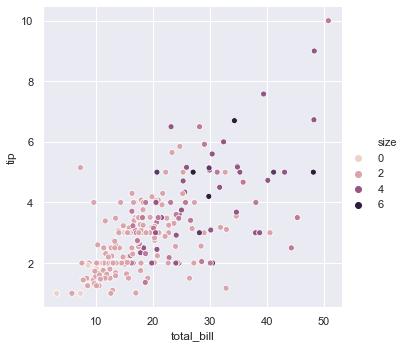

In [8]:
# plot data
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips)

* Customising the colour palette can help distinguish points or theme outputs.
* Again, press shift + tab to see the different options you have available to tweak this.
* The lower the 'l' value, the darker the colours (0 is all black).
* The 'r' can be any negative or positive value, play around to alter the colour scheme.

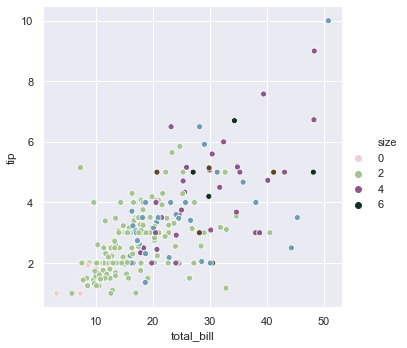

In [9]:
# plot data with custom colour scheme
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips,
            palette = 'ch:r=-2, l=0.85')

* You can also alter the size of the points if a variable which tells you volume/scale/value is set to the 'size' variable.
* Therefore you can play with hue, style and size to represent data values in clever ways which don't require the plotting of additional charts or axes.
* Hue is colour, style is shape of point (cross, dot etc.) and size is size.

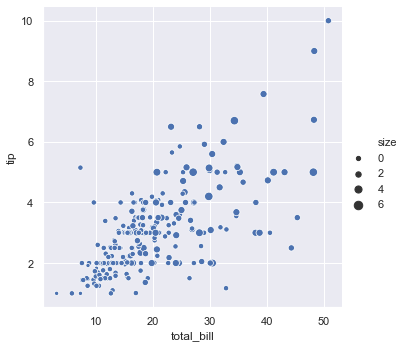

In [10]:
# plot data with point size based on variable
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size')

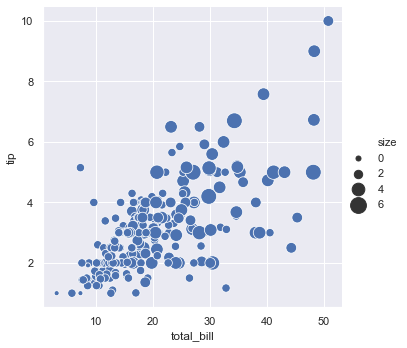

In [11]:
# control the min and max point sizes
sns.relplot(x = 'total_bill', y = 'tip', data = tips,
            size = 'size', sizes = (25, 250))

In [12]:
# load modules
from numpy.random import randn

# create df with basic incremental count in time col and random number
# which sums cumulatively based on previous numbers in array
# NOTE: df column names are determined from the text you use in the code
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))

# peek at df
df.head()

,time,value
0,0,-0.713271
1,1,-0.843219
2,2,-1.051673
3,3,-1.830729
4,4,-0.124411


* The 'time' column is already sorted because of how it was created, but if it wasn't and we wanted to sort it, you can use the commented out code below (i.e. sort = True)

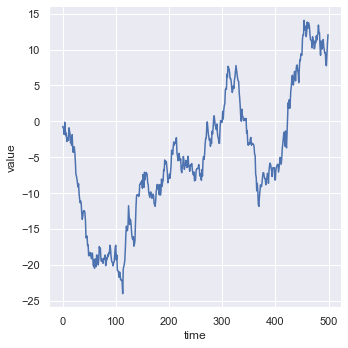

In [13]:
# plot data and define type of plot (line chart here)
sns.relplot(x = 'time', y = 'value', kind='line', data=df) #, sort = True)

* Just as a reminder, 'randn' (from numpy.random module) generates random numbers from a normal (a.k.a. Gaussian distribution, with a mean of 0 and variance of 1).
* The number 2 in the below code (i.e. randn(500, 2)) means that we are producing an array which is 500 rows and 2 columns, hence we are creating the data for both time and value together.

In [14]:
# create df (this time randomly rather than sequentially generating 'time')
df = pd.DataFrame(randn(500, 2).cumsum(axis = 0), columns = ['time', 'value'])

# peek at df
df.head()

,time,value
0,1.437786,1.052328
1,3.366087,0.183385
2,1.832757,-1.099541
3,1.683190,-1.642030
4,1.624769,-0.055205


* The first plot below is unsorted (set to False) and you can see the data is almost non-sensical.
* Sorting it (see plot 2 below) is much more straight forward to analyse.

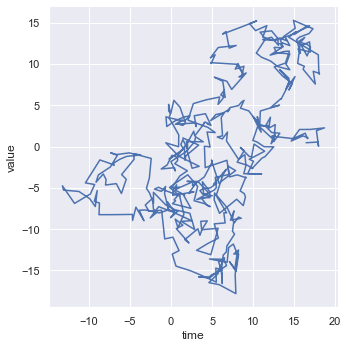

In [15]:
# plot data and define type of plot (line chart here)
sns.relplot(x = 'time', y = 'value', kind='line', data=df, sort = False)

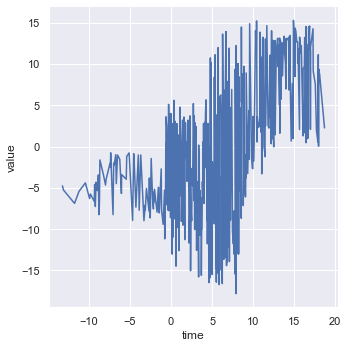

In [16]:
# plot data and define type of plot (line chart here)
sns.relplot(x = 'time', y = 'value', kind='line', data=df, sort = True)

### Smoothing, Estimators and Confidence Intervals

In [17]:
# load dataset (MRI data on different people, looking at different regions)
fmri = sns.load_dataset('fmri')

# peek at dataset
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


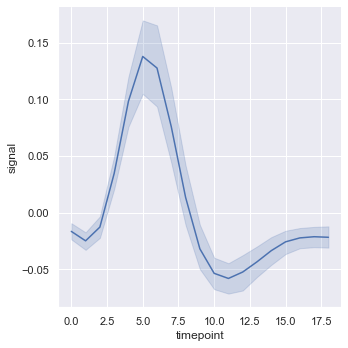

In [18]:
# plot data in basic relational plot
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri)

* In the above plot, because there are multiple signal values at each timepoint (because the data consists of more than one subject), you can't just plot every single line as it would look chaotic.
* So here, the dark blue line represents the mean of the signal at each timepoint, whilst the faded blue area shows the confidence interval (i.e. there is a 95% chance of the signal value occurring in this shaded area).
* You can turn off this area using 'ci' as below.

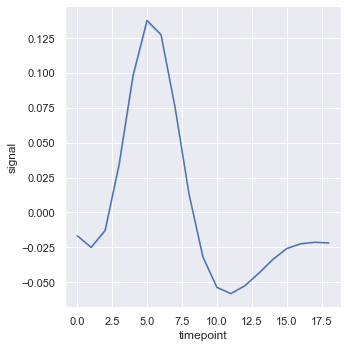

In [19]:
# turn off confidence intervals
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line',
            data = fmri, ci = False) # shift + double tab to see other options

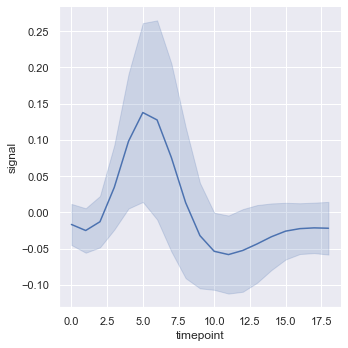

In [20]:
# use standard deviation instead of mean
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line',
            data = fmri, ci = 'sd')

* The above plots appear smooth because the seaborn plot model automatically assumes the gradient between each point, averaging each value to create a smoother curve.
* If you want to disable this and purely view the actual data points, you can set 'estimator' to false (see below).
* This makes the data slightly harsher to view but you are only now looking at actual data and no inferred values.

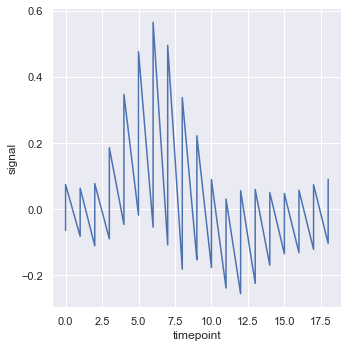

In [21]:
# plot same data without estimation/smoothing
sns.relplot(x = 'timepoint', y = 'signal',
            estimator = None, kind = 'line', data = fmri)

* We can use the categorical variables in the data to split out different categorical fields (e.g. event in above data).

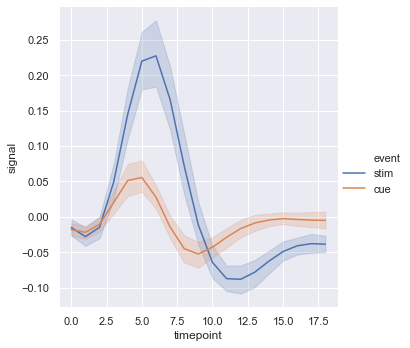

In [22]:
# plot with hue to distinguish events (cue and stim)
sns.relplot(x = 'timepoint', y = 'signal',
            hue = 'event', kind = 'line', data = fmri)

* NOTE: if you were to get rid of 'kind = 'line'', it would simply plot all the data as points, which is obviously trickier to interpret with lots of data points.
* Using style and hue in combination enables you to split out multiple categorical variables at once (event and region below).

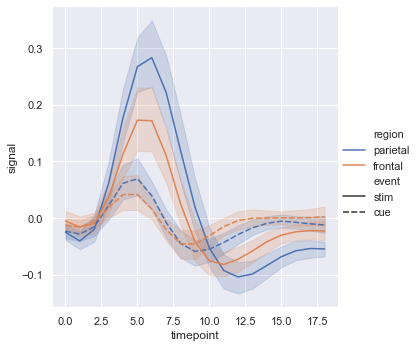

In [23]:
# plot with different styles
sns.relplot(x = 'timepoint', y = 'signal', style = 'event',
            kind = 'line', hue = 'region', data = fmri)

* There's almost no limit to customisation, you can use shift + tab (or double tab) to see the various parameters to adjust appearance.
* Below we have added markers and adjusted dashes.

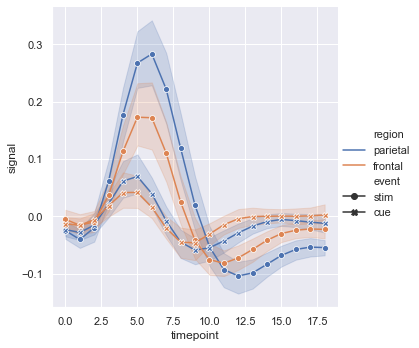

In [24]:
# you can tweak the styles even more so
sns.relplot(x = 'timepoint', y = 'signal', style = 'event',
            kind = 'line', hue = 'region', data = fmri,
            markers = True, dashes = False)

* Providing the same categorical variable for both hue and style, means you will be showing the same data but you can alter the line style and colour of lines at the same time.

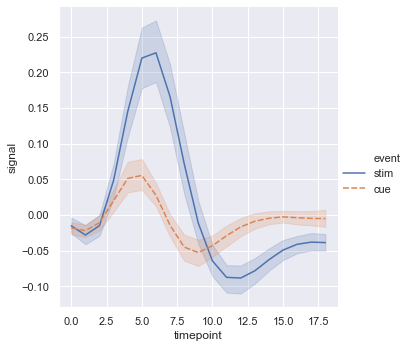

In [25]:
# plot with different styles
sns.relplot(x = 'timepoint', y = 'signal', style = 'event',
            kind = 'line', hue = 'event', data = fmri)

* You can split lines out for each categorical variable if desired, but of course for large datasets this can be overwhelming.
* Therefore, it's often more useful to use this method on subsets of data that are easier to view together (see data = fmri.query("event == 'stim'")
* You must also turn estimators off because the overlapping confidence intervals would be chaos to view.
* **df.query(...) is a really useful way of quickly extracting specific subsets of data.**

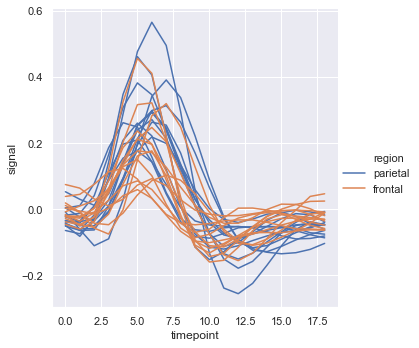

In [26]:
# plot data and distinguish each individual subject
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region',
            units = 'subject', data = fmri.query("event == 'stim'"),
            kind = 'line', estimator = None)

In [27]:
# load new dataset and select subset only
dots = sns.load_dataset('dots').query("align == 'dots'")

# peek at data
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


* Using a numerical column for hue (vs. a categorical column above) allows you to see more of a gradient of colour between the different values.

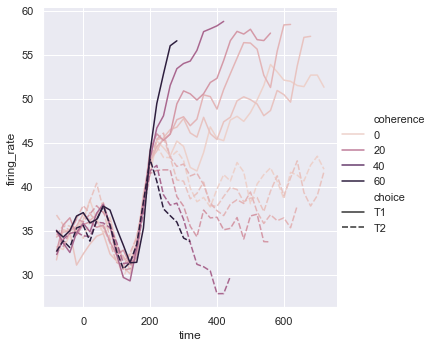

In [28]:
# plot data
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line',
            hue = 'coherence', style = 'choice')

* The above colour scale (i.e. default hue selection) can be an issue for people who are colour blind or have poor eyesight, therefore you can select more distinct palettes and pick specific colours to make the different lines more distinct.
* The closer 'light' is to 1, the brighter and mor distinguished the colours will be.
* The number of colours you select will determine the gradient of change shown in your legend.

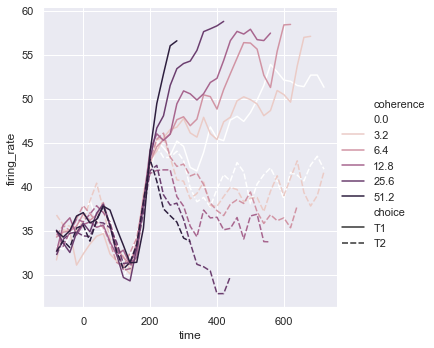

In [29]:
# define palette
palette = sns.cubehelix_palette(light = 1, n_colors=6)

# plot data
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line',
            hue = 'coherence', style = 'choice', palette = palette)

* You can use multiple methods to differentiate lines, such as size of line width and also colour/hue/style.

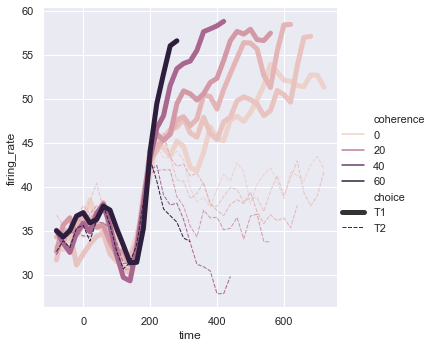

In [30]:
# plot data and alter line width based on numerical variable value
sns.relplot(x = 'time', y = 'firing_rate',
            size = 'choice', style ='choice', hue = 'coherence',
            kind = 'line', data = dots, sizes = (1, 5)) # sizes alters range

### Plotting Dates

In [31]:
# create dataframe from 2nd June 2019 to 500 days later
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02', periods = 500),
                       value = randn(500).cumsum()))

# peek at data
df.head()

,time,value
0,2019-06-02,1.267198
1,2019-06-03,2.003965
2,2019-06-04,3.220610
3,2019-06-05,4.056797
4,2019-06-06,1.847099


* Relplot creates a facetgrid, so far we've just been creating single plots, tweaking them a bit and then overwriting.
* If we assign these plots to objects we can do far more with them.

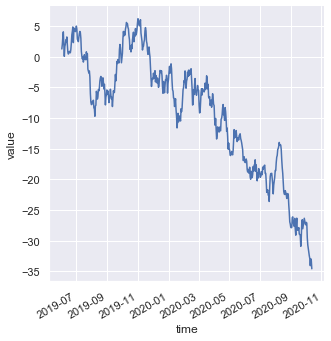

In [32]:
# assign plot data into facet grid object
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)

# you can now do things to your plot object
# this method below adjusts core concepts like axis labels
g.fig.autofmt_xdate()

### Creating Grids of Plots
* Let's go back and use the tips data to play around with multiple plots.
* The first thing we'll due is use 'col' and assign a categorical variable to it, this means that the 'columns' of our plot grid will enable us to split out multiple plots based on the values in the categorical field.
* Below we have split plots out based on time, so we see one plot for lunch and another for dinner.

In [33]:
# peek at tips data again
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


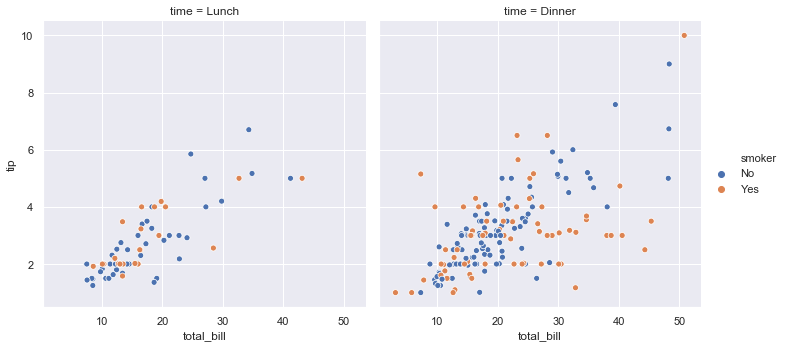

In [34]:
# plot data using 'time' to split into multiple plots
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time',
            data = tips)

* Obviously if you have lots of values in your categorical or numerical variable in the 'col' argument, your plots will be tiny and probably show too much data to take in.
* NOTE: you can also use 'row = 'size'' instead of col in the below code and it will plot the charts one above the other.

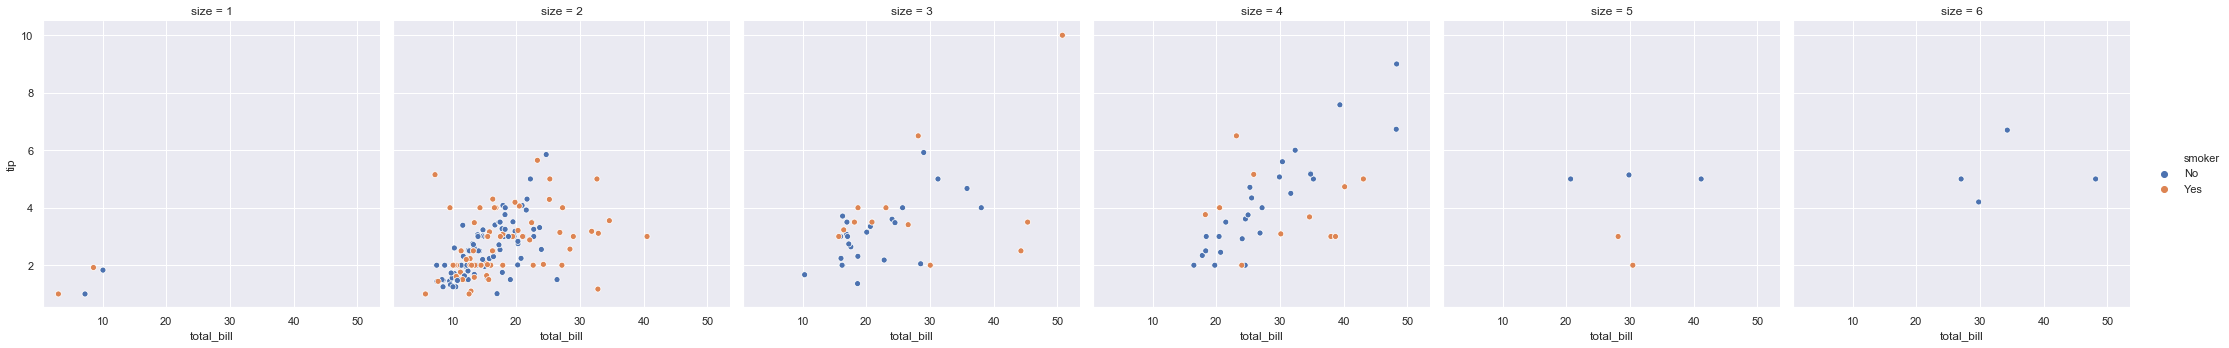

In [35]:
# plot data using 'size' to split into multiple plots
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size',
            data = tips)

* You can combine row and col arguments to plot a grid of charts.
* Parameters like height can be used to adjust the size of plots to make them more visible.

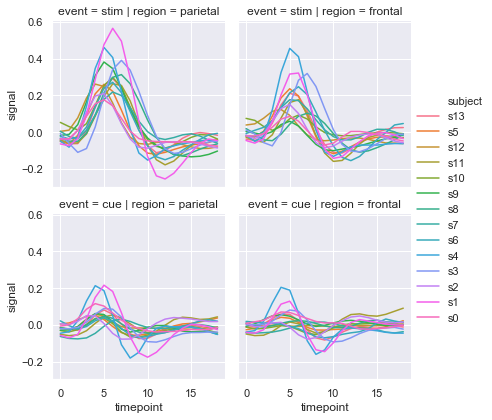

In [36]:
# 2x2 matrix of plots
sns.relplot(x = 'timepoint', y = 'signal', hue = 'subject', col = 'region',
            row = 'event', height = 3, kind = 'line',
            estimator = None, data = fmri)

* You can overcome the issue of multiple plots appearing in a long set of columns or many rows by using "col_wrap" to define the max number of columns before starting a new row.

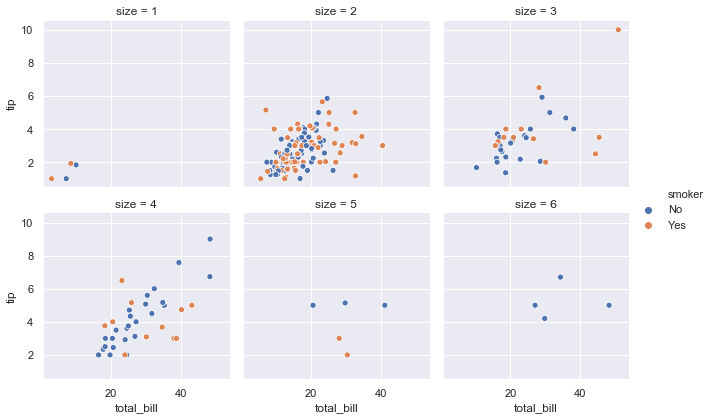

In [40]:
# plot charts into a grid
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size',
            data = tips, col_wrap = 3, height = 3)

### Other Plots: Line and Scatter
* Basic line plots look identical to relational plots where you have specified kind = 'line', it's just the code/syntax which varies.

In [41]:
# peek at data
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


* Confidence intervals can be altered from standard grey area to bars or other types using below code.

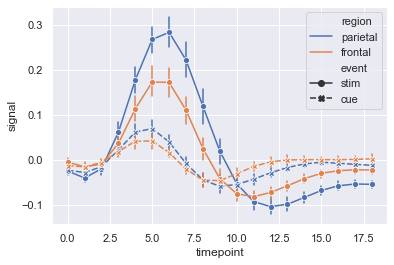

In [42]:
# plot data in a line chart and play with options
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'region',
             style = 'event', data = fmri, markers = True,
             ci = 75, err_style = 'bars')

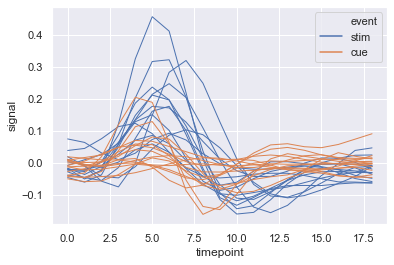

In [43]:
# plot data with customisation
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', units = 'subject',
             estimator = None, lw = 1, data = fmri.query("region == 'frontal'"))

In [44]:
# peek at other dataset
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


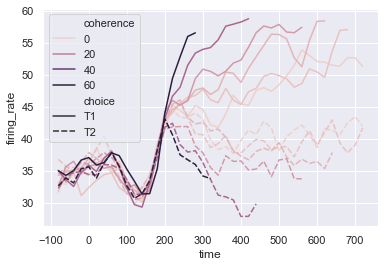

In [45]:
# plot same data as above in facet grid but with line plot
sns.lineplot(x = 'time', y = 'firing_rate', hue = 'coherence',
             style = 'choice', data = dots)

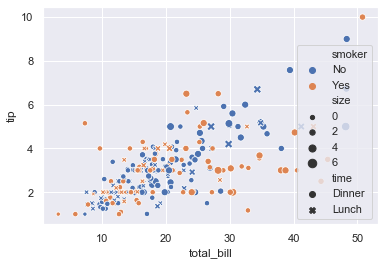

In [47]:
# plot scatterplot of tip data
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips,
                hue = 'smoker', size = 'size', style= 'time')

### Iris Data

In [48]:
# load iris data
iris = sns.load_dataset('iris')

# peek at data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


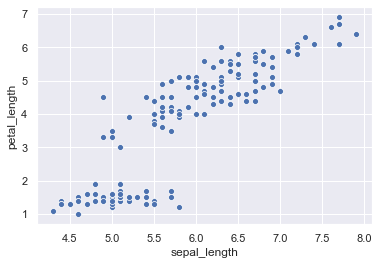

In [49]:
# plot iris data
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris)

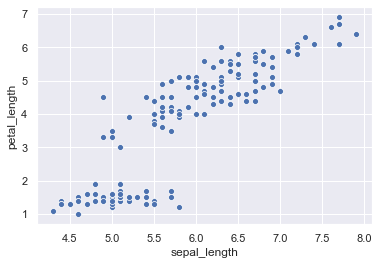

In [50]:
# plot same data as above just using different syntax
sns.scatterplot(x = iris['sepal_length'], y = iris['petal_length'])